# Import MTCNN package


In [1]:
import mtcnn
print(mtcnn.__version__)

Using TensorFlow backend.
f:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
f:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
f:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
f:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

0.1.0


# Face Detection with MTCNN 

{'box': [884, 606, 499, 662], 'confidence': 0.9999945163726807, 'keypoints': {'left_eye': (1040, 877), 'right_eye': (1272, 851), 'nose': (1173, 976), 'mouth_left': (1065, 1109), 'mouth_right': (1284, 1090)}}


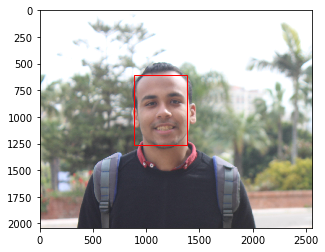

In [3]:
# import packages
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
# load image from file
filename = 'test.jpg'
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# plot the image
pyplot.imshow(pixels)
# get the context for drawing boxes
ax = pyplot.gca()
for face in faces:
    print(face)
    # get coordinates
    x, y, width, height = face['box']
    #create a rectangle box around the face
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    




# Test Face Detection Model on Video

In [19]:
# import openCV library 
import cv2
# capture web-cam
cap = cv2.VideoCapture(0)
# generate video file for output video
frame_width = 640    #frame width of your cam
frame_height = 480   #frame height of your cam 
out = cv2.VideoWriter('face_detection.mp4',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
# create the detector, using default weights
detector = MTCNN()
while True:
    ret, frame = cap.read()
    if ret == True:
        # detect faces in the image
        faces = detector.detect_faces(frame)
        # display faces on the original image
        for face in faces:
            #get coordinates
            x1, y1, width, height = face['box']
            #get end point of box
            x2 = x1 + width
            y2 = y1 + height 
            #draw a rectangle box around faces
            cv2.rectangle(frame, (x1,y1), (x2,y2), (0,255,0) , 2)
            #draw the dots
            for key, value in face['keypoints'].items():
                cv2.circle(frame, value, 2, (0,255,0), 2)
        cv2.imshow('output_video',frame)
        #save frame in output video
        out.write(frame)
        #click on q button to close windows
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
out.release()
cv2.destroyAllWindows()